<a href="https://colab.research.google.com/github/NgWeiZhen/Colab/blob/master/Active_Learning_for_breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install modAL
#Install modal library which is built for active learning purpose, details at here: https://modal-python.readthedocs.io/en/latest/#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Mount on google drive

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/Kaggle
#Check the present working directory using pwd command

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
#Download breast cancer data set from Kaggle, can check here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 11.9MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip
#unzipping the zip files and deleting the zip files

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
!ls
#Check file

 database.sqlite   Iris.csv	'Speed Dating Data.csv'
 data.csv	   kaggle.json	'Speed Dating Data Key.doc'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
import pandas as pd
#Import necessary libraries

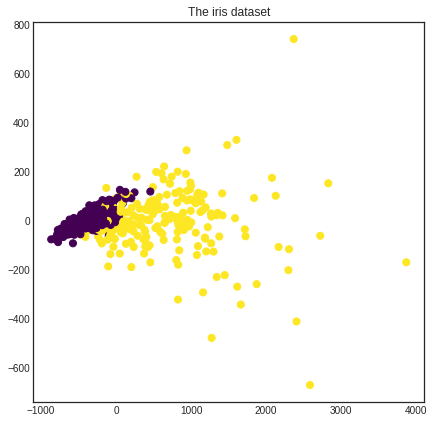

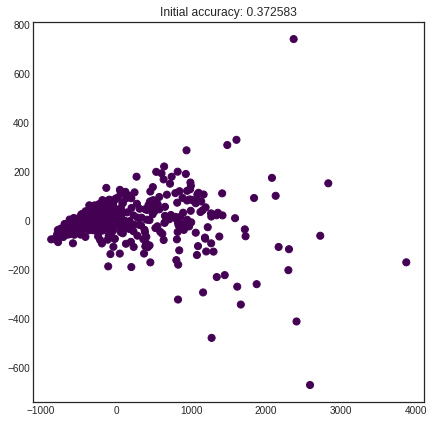

Accuracy before active learning: 0.372583
Accuracy after query no. 1: 0.372583
Accuracy after query no. 2: 0.372583
Accuracy after query no. 3: 0.372583
Accuracy after query no. 4: 0.372583
Accuracy after query no. 5: 0.766257
Accuracy after query no. 6: 0.762742
Accuracy after query no. 7: 0.759227
Accuracy after query no. 8: 0.759227
Accuracy after query no. 9: 0.808436
Accuracy after query no. 10: 0.808436
Accuracy after query no. 11: 0.664323
Accuracy after query no. 12: 0.664323
Accuracy after query no. 13: 0.699473
Accuracy after query no. 14: 0.731107
Accuracy after query no. 15: 0.787346
Accuracy after query no. 16: 0.787346
Accuracy after query no. 17: 0.778559
Accuracy after query no. 18: 0.775044
Accuracy after query no. 19: 0.773286
Accuracy after query no. 20: 0.773286
Accuracy after query no. 21: 0.889279
Accuracy after query no. 22: 0.892794
Accuracy after query no. 23: 0.892794
Accuracy after query no. 24: 0.892794
Accuracy after query no. 25: 0.889279
Accuracy after qu

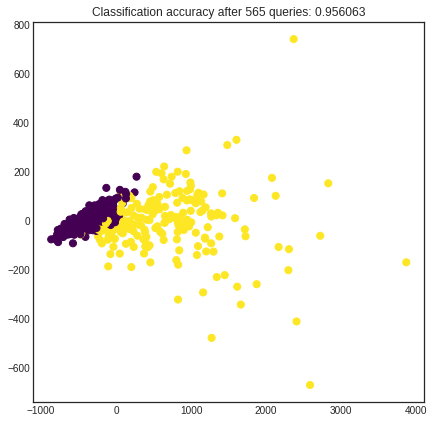

In [ ]:
#Import data and transform in array form store as 'temp' and 'temp_y' variables
df01 = pd.read_csv('data.csv')
del df01['id']
df01['diagnosis'] = df01['diagnosis'].astype('category')
df01['diagnosis'] = df01['diagnosis'].cat.codes
df_train = df01[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
df_train_y = df01['diagnosis']
temp = df_train.values
temp_y = df_train_y.values

# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(temp)
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=temp_y, cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

# initial training data
train_idx = [0, 50, 100]
X_train = temp[train_idx]
y_train = temp_y[train_idx]

# generating the pool
X_pool = np.delete(temp, train_idx, axis=0)
y_pool = np.delete(temp_y, train_idx)

# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)


# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(temp)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(temp, temp_y))
    plt.show()

print('Accuracy before active learning: %f' % learner.score(temp, temp_y))

# pool-based sampling
n_queries = df01.shape[0] - 4
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(temp, temp_y)))

# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(temp)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(temp, temp_y)))
    plt.show()
